Avance 4. Modelos alternativos

### Integrantes:

- **A01794940** José de Jesús Peña Rodríguez.  
- **A01283104** Kevin Dueñas Aguirre.  
- **A01794191** Juan Antonio Chiñas Mata.


In [34]:
import os
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import importlib
import kmean_func
importlib.reload(kmean_func)

<module 'kmean_func' from '/Users/josedejesuspena/Documents/IntProject_Team8/IntProject_Team8/notebooks/kmean_func.py'>

# Reading CSV file from local route

In [35]:
warnings.filterwarnings("ignore")
CSV_PATH = "dataset/Datos_Imgenes.csv"
df = pd.read_csv(kmean_func.read_csv(CSV_PATH))

## Data Preprocessing  
Based on a preliminary session with our tutor, we identified several columns that either lacked relevant information or contained redundant data already present in other columns. Consequently, we decided to remove the following columns:  

- `index`  
- `date`  
- `page`  
- `TotalPages`  
- `ModelApplied`  
- `Details`  
- `ModelReported`  

## Project Objective  
For this project, it was explicitly required to develop a solution and analysis to identify groups of documents acquired by different machine learning models.  

### Machine Learning Models  
The models involved in this process are:  

- `Model`  
- `Estado_cuenta`  
- `Recibo_nomina`  
- `INE`  
- `Comprobante_domicilio`  
- `Carta_libranza`

In [36]:
columns_to_delete = ["Index", "Date", "Page", "TotalPages","ModelApplied", "ConfR", "ConfA", "ConfW","Details","ModelReported","DocType"]
df = df.drop(columns=columns_to_delete, axis=1)

# Creating a filter on Model column 

## Data Filtering and Preparation  

In the following cells, we will apply filters to our base dataframe `df`, to extract a new dataframe called `models`.  

The `models` dataframe will allow us to apply further filtering and generate new dataframes, each containing the necessary information for clustering.  


In [37]:
models = df["Model"].value_counts()
models

Model
estado_cuenta            34140
recibo_nomina            10193
ine                       9346
comprobante_domicilio     5780
carta_libranza            3501
Name: count, dtype: int64

## Filtered Dataframes  

By applying filters, we can generate new observations and create specific dataframes based on relevant criteria.  

- **`df_edo_cta`**: This dataframe will contain at least four distinct values in the `ClassId` column: `TXT`, `APP`, `SUC`, and `ATM`.  
- **`df_nom`**: This dataframe will have exactly four distinct values, using `DocType` as the reference column.  
- **`df_ine`**: This dataframe will contain only two distinct values, taking `DocType` as the reference column.  
- **`df_addy`**: This dataframe will include six different values, using `DocType` as the reference column.  



## Displaying all diferent values in:
- `estado_cuenta`  
- `recibo_nomina`  
- `ine`  
- `comprobante_domicilio`  

In [38]:
df_edo_cta = kmean_func.col_filter(df, "Model", "estado_cuenta")
df_nom = kmean_func.col_filter(df, "Model", "recibo_nomina")
df_ine = kmean_func.col_filter(df, "Model", "ine")
df_addy = kmean_func.col_filter(df, "Model", "comprobante_domicilio")
df_lib = kmean_func.col_filter(df, "Model", "carta_libranza")

# PREPROCESING PER MODEL 

<small>

## Clustering Procedure for Each Model  


</small>


In [39]:
df_edo_cta.drop(columns=["Model","ClassId"], inplace=True)
df_nom.drop(columns=["Model","ClassId"], inplace=True)
df_ine.drop(columns=["Model","ClassId"], inplace=True)
df_addy.drop(columns=["Model","ClassId"], inplace=True)

## Model- Estado cuenta

In [40]:
df_edo_cta

,PagesProcessed,Fields,EmptyFields,Sharpness,Contrast,Clarity,Resolution
4,2,27,1,262.000000,36.000000,9512.000000,479.000000
5,2,27,1,273.000000,35.000000,9706.000000,491.000000
10,4,27,18,1573.000000,64.000000,100811.000000,1446.000000
11,4,27,18,25.000000,38.000000,981.000000,101.000000
12,4,27,18,154.000000,51.000000,7973.000000,340.000000
...,...,...,...,...,...,...,...
62882,1,0,0,61.794301,54.614479,3374.863560,243.595843
62883,3,0,0,216.913444,42.823179,9288.923238,623.457682
62884,3,0,0,219.959205,44.057762,9690.910275,645.235095
62885,3,0,0,208.455581,40.573870,8457.849713,580.671118


## Training the KNSS for Clustering  

In [41]:
#Make a list for all df columns 
list_col = list(df_edo_cta.columns)

#Get the combinations between columns
X_var = kmean_func.var_comb(list_col)

#Make pairs between columns
X_pairs = kmean_func.pairs_x(list_col, X_var) 

#Make the X by joining the minilists of pairs
X_edo_cta = kmean_func.get_x(X_pairs, df_edo_cta)

#Calculates de wss 
edo_cta_wss = kmean_func.wss_list(X_edo_cta)

#Plot Elbow graphs for each pair 
num_cols = 3
num_rows = 7 
kmean_func.plt_elbow(edo_cta_wss,num_rows,num_cols,X_var)

### KNSS Training

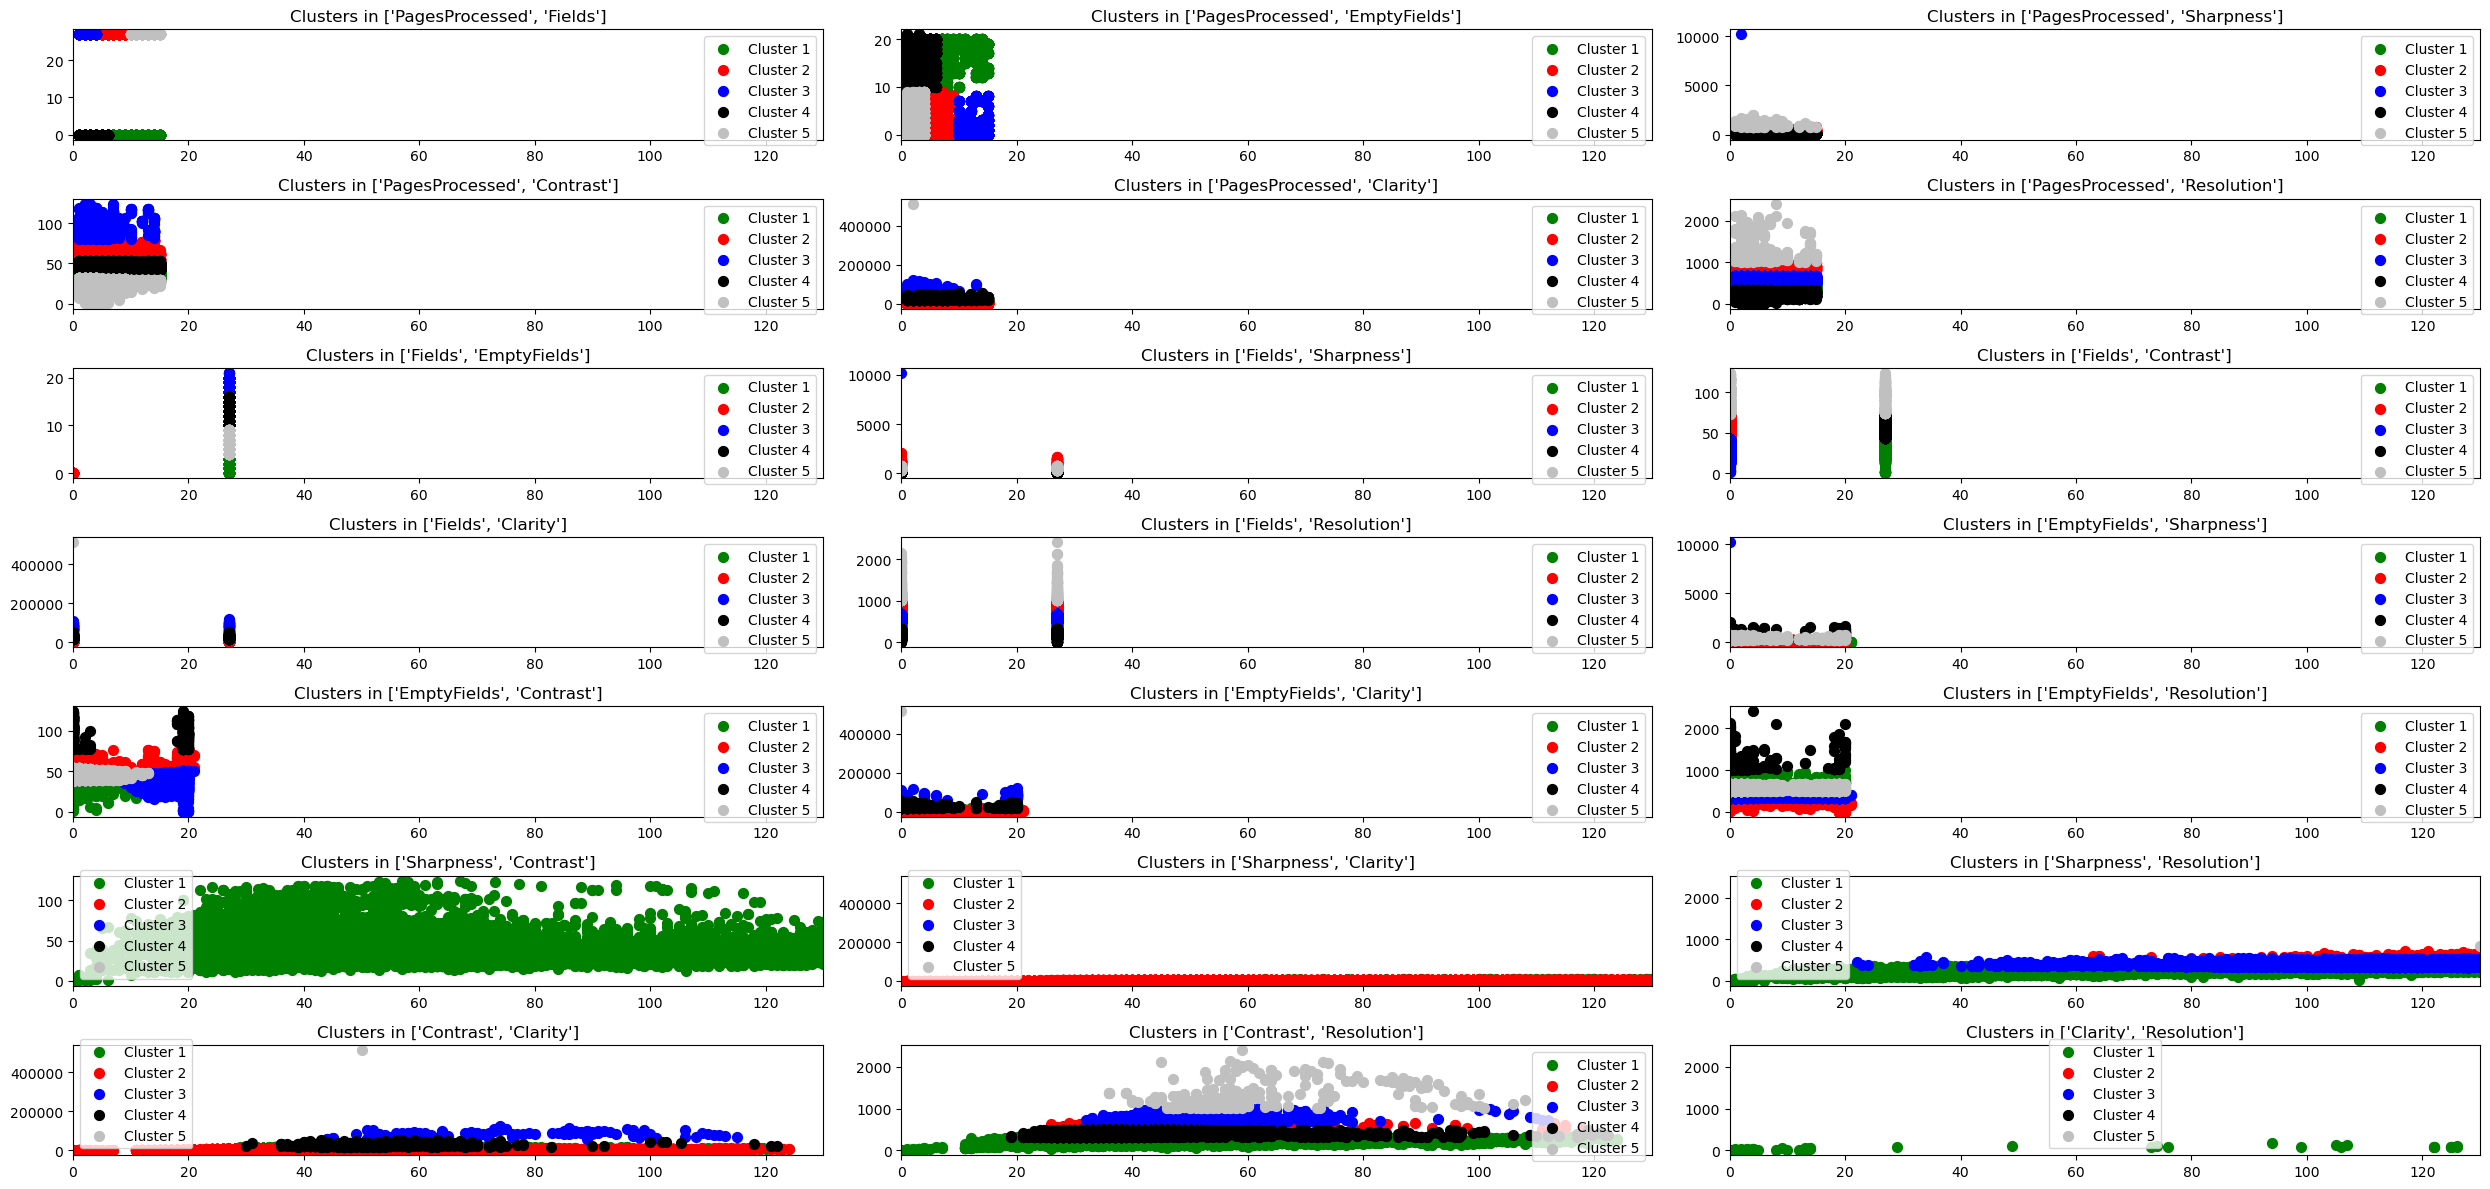

In [52]:
#Define number of clusters
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, init="k-means++", random_state=0)

#Get the Y by training the data for each list of pairs
y_edo_cta = [kmeans.fit_predict(data) for data in X_edo_cta]

#Plot results
kmean_func.multi_plot_clusters(num_clusters, X_edo_cta,y_edo_cta, X_var)


The clustering effectively separates the Estado Cuenta data into four distinct groups, with varying patterns in Contrast and Resolution. This suggests meaningful differences in document characteristics, and the clusters can provide valuable insights for further analysis or classification tasks.

## Model- Recibo de Nomina

### Codification OneHot for categorical columns

In [ ]:
X_nom = kmean_func.get_x(X_pairs, df_nom)
nom_wss = kmean_func.wss_list(X_nom)

### Best number of cluster is 5 based on Graphs 

In [ ]:
kmean_func.plt_elbow(nom_wss,X_var)

TypeError: plt_elbow() missing 2 required positional arguments: 'num_cols' and 'var_list'

The clustering of Recibo Nomina data using Contrast, Resolution, Sharpness and Clarity reveals four clear groups, indicating meaningful separations in the dataset. The compact clusters and distinct centroids suggest that the k-means model effectively captured the data structure. These results highlight the relevance of the chosen features and provide a basis for further categorization or validation.

In [ ]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, init="k-means++", random_state=3)

y_0 = kmeans.fit_predict(X_nom[0]) # [['Sharpness', 'Contrast']
y_1 = kmeans.fit_predict(X_nom[1]) # ['Sharpness', 'Clarity']
y_2 = kmeans.fit_predict(X_nom[2]) # ['Sharpness', 'Resolution']
y_3 = kmeans.fit_predict(X_nom[3]) # ['Contrast', 'Clarity']
y_4 = kmeans.fit_predict(X_nom[4]) # ['Contrast', 'Resolution']
y_5 = kmeans.fit_predict(X_nom[5]) #  ['Clarity', 'Resolution']

y_nom = [y_0, y_1, y_2, y_3, y_4,y_5]

In [ ]:
len(X_nom)

21

In [ ]:
kmean_func.multi_plot_clusters(5, X_nom,y_nom, X_var)

AttributeError: module 'kmean_func' has no attribute 'multi_plot_clusters'

## Model- INE

clusters the INE data using the Contrast (X-axis) and Resolution (Y-axis) features with the k-means algorithm. It calculates the WCSS for 1 to 10 clusters to determine the optimal number of clusters and selects 2 clusters (n_clusters=2). The data points are plotted, with each cluster represented by distinct colors (green and red), and the cluster centroids are highlighted in yellow.

In [ ]:
df_ine = pd.get_dummies(df_ine, columns=["DocType"], drop_first=False)
df_ine.info()

In [ ]:
X_ine = kmean_func.get_x(X_pairs, df_ine)
ine_wss = kmean_func.wss_list(X_ine)

### Best number of cluster is 2 based on Graphs 

In [ ]:
kmean_func.plt_elbow(ine_wss,X_var)

### KNSS Training

In [ ]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, init="k-means++", random_state=3)

y_0 = kmeans.fit_predict(X_ine[0]) # [['Sharpness', 'Contrast']
y_1 = kmeans.fit_predict(X_ine[1]) # ['Sharpness', 'Clarity']
y_2 = kmeans.fit_predict(X_ine[2]) # ['Sharpness', 'Resolution']
y_3 = kmeans.fit_predict(X_ine[3]) # ['Contrast', 'Clarity']
y_4 = kmeans.fit_predict(X_ine[4]) # ['Contrast', 'Resolution']
y_5 = kmeans.fit_predict(X_ine[5]) #  ['Clarity', 'Resolution']

y_ine = [y_0, y_1, y_2, y_3, y_4,y_5]

In [ ]:
kmean_func.plot_clusters(2, X_ine,y_ine, X_var)

Results shows two distinct groups based on Contrast and Resolution. The clusters are well-separated, indicating clear differences in the data distribution. This separation could provide insights into distinct patterns within the INE data and support further classification or analysis.

## Model- Comprobante de domicilio

In [ ]:
df_addy = pd.get_dummies(df_addy, columns=["DocType"], drop_first=False)
df_addy.info()

In [ ]:
X_addy = kmean_func.get_x(X_pairs, df_addy)
addy_wss = kmean_func.wss_list(X_addy)

### Best number of cluster is 6 based on Graphs 

In [ ]:
kmean_func.plt_elbow(addy_wss,X_var)

### KNSS Training

In [ ]:
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, init="k-means++", random_state=3)

y_0 = kmeans.fit_predict(X_addy[0]) # [['Sharpness', 'Contrast']
y_1 = kmeans.fit_predict(X_addy[1]) # ['Sharpness', 'Clarity']
y_2 = kmeans.fit_predict(X_addy[2]) # ['Sharpness', 'Resolution']
y_3 = kmeans.fit_predict(X_addy[3]) # ['Contrast', 'Clarity']
y_4 = kmeans.fit_predict(X_addy[4]) # ['Contrast', 'Resolution']
y_5 = kmeans.fit_predict(X_addy[5]) #  ['Clarity', 'Resolution']

y_addy = [y_0, y_1, y_2, y_3, y_4,y_5]

In [ ]:
kmean_func.plot_clusters(6, X_addy,y_addy, X_var)

The clustering reveals six distinct groups based on Contrast and Resolution, indicating clear separations in the dataset. This clustering can be used to analyze patterns or similarities within the Comprobante de Domicilio data, providing meaningful insights for classification or further analysis.

## Conclusions


- **Categorical Data Encoding**:
1. One-hot encoding successfully transformed the ClassId variable into numerical form, making it interpretable for the model.
2. The increase in dimensionality could impact model performance, suggesting possible dimensionality reduction techniques in future analysis.

- **WCSS for Clustering**:  
1. The WCSS curve shows a clear elbow around k=4, indicating that 4 clusters provide a good balance between variance reduction and computational efficiency.
2. Increasing k beyond 4 offers minimal improvements, reinforcing this choice for optimal clustering.

- **KMeans Clustering Implementation**:  
1. KMeans clustering with k=4 effectively segments the data based on selected feature pairs.
2. Some feature pairs yield more distinct clusters, highlighting the importance of selecting the right attributes for segmentation.
3. Consistency across different feature combinations suggests a strong underlying structure in the data.



The analysis confirms that one-hot encoding effectively transforms categorical data while increasing dimensionality. The WCSS curve justifies k=4 as the optimal number of clusters, balancing variance reduction and efficiency. The KMeans results show consistent and distinct segmentations across different feature pairs, highlighting the relevance of Sharpness, Contrast, Clarity, and Resolution in clustering. The stability of results suggests a strong underlying structure, reinforcing the model’s reliability.